In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
import tensorflow as tf
print(tf.__version__)

def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)

2.4.0


In [2]:
df = pd.read_csv('fake_reg.csv')
df.head()

price     feature1     feature2
0  461.527929   999.787558   999.766096
1  548.130011   998.861615  1001.042403
2  410.297162  1000.070267   998.844015
3  540.382220   999.952251  1000.440940
4  546.024553  1000.446011  1000.338531

In [3]:
df.shape

(1000, 3)

In [4]:
df.isnull().sum()

price       0
feature1    0
feature2    0
dtype: int64

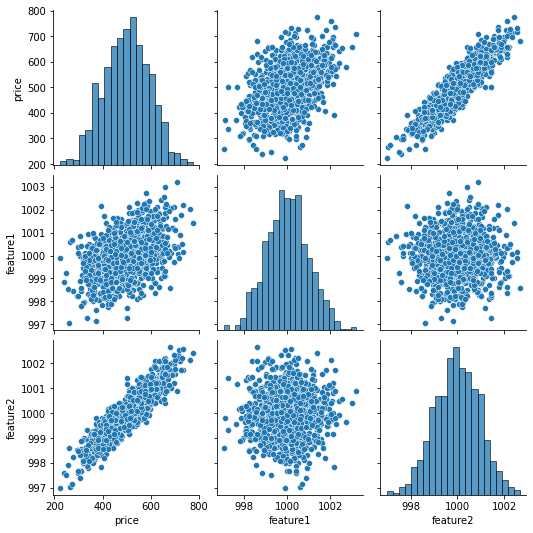

In [5]:
sns.pairplot(df)

In [6]:
df.corr()

price  feature1  feature2
price     1.000000  0.444190  0.907576
feature1  0.444190  1.000000  0.030607
feature2  0.907576  0.030607  1.000000

In [7]:
from sklearn.model_selection import train_test_split
X = df[['feature1','feature2']].values # For Keras we need arrays not dataframe.
y = df[['price']].values # For Keras we need arrays not dataframe.
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.3,random_state=42)

In [8]:
# result will be between 0 and 1 x_new = Xi-min(x)/ (max(x)-min(x) )
#scaler.fit(X_train)
#X_train = scaler.transform(X_train)
#X_test = scaler.transform(X_test)

from sklearn.preprocessing import MinMaxScaler 
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [9]:
#units 1 hidden layerdaki  kac adet neuron(yuvarlak) olacak onu soyler
#input sayisi data daki feature sayisi
#input_dim=2 or inptut_dim - xtrain.shape[0]
#batchsize 32 satir 32 satir gonder veriyi
#epochs 1 gitti 1 geldi esittir 1 epoch
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation
model = Sequential()
model.add(Dense(4,activation='relu')) #Input Layer 
model.add(Dense(4,activation='relu')) #HIdden Layer 1
model.add(Dense(2,activation='relu')) #HIdden Layer 2
model.add(Dense(1)) #Outpur Layer
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train, y_train, batch_size=32, epochs=250) 
print(model.summary())

Epoch 1/250
22/22 [==============================] - 1s 2ms/step - loss: 252326.3431
Epoch 2/250
22/22 [==============================] - 0s 2ms/step - loss: 250546.0788
Epoch 3/250
22/22 [==============================] - 0s 2ms/step - loss: 254090.3764
Epoch 4/250
22/22 [==============================] - 0s 2ms/step - loss: 254637.5258
Epoch 5/250
22/22 [==============================] - 0s 2ms/step - loss: 252726.2188
Epoch 6/250
22/22 [==============================] - 0s 2ms/step - loss: 257684.5469
Epoch 7/250
22/22 [==============================] - 0s 3ms/step - loss: 254298.5564
Epoch 8/250
22/22 [==============================] - 0s 2ms/step - loss: 257456.8288
Epoch 9/250
22/22 [==============================] - 0s 2ms/step - loss: 255303.4993
Epoch 10/250
22/22 [==============================] - 0s 2ms/step - loss: 257920.0965
Epoch 11/250
22/22 [==============================] - 0s 2ms/step - loss: 263294.8220
Epoch 12/250
22/22 [==============================] - 0s 2ms/st

22/22 [==============================] - 0s 1ms/step - loss: 69499.5815
Epoch 97/250
22/22 [==============================] - 0s 1ms/step - loss: 65174.7013
Epoch 98/250
22/22 [==============================] - 0s 1ms/step - loss: 59325.5430
Epoch 99/250
22/22 [==============================] - 0s 1ms/step - loss: 55620.3536
Epoch 100/250
22/22 [==============================] - 0s 1ms/step - loss: 49961.2486
Epoch 101/250
22/22 [==============================] - 0s 1ms/step - loss: 45128.0593
Epoch 102/250
22/22 [==============================] - 0s 1ms/step - loss: 41455.9013
Epoch 103/250
22/22 [==============================] - 0s 1ms/step - loss: 35499.8925
Epoch 104/250
22/22 [==============================] - 0s 1ms/step - loss: 33135.1151
Epoch 105/250
22/22 [==============================] - 0s 2ms/step - loss: 29656.8774
Epoch 106/250
22/22 [==============================] - 0s 1ms/step - loss: 25937.7246
Epoch 107/250
22/22 [==============================] - 0s 1ms/step - lo

22/22 [==============================] - 0s 1ms/step - loss: 594.4641
Epoch 193/250
22/22 [==============================] - 0s 1ms/step - loss: 552.6204
Epoch 194/250
22/22 [==============================] - 0s 1ms/step - loss: 540.3255
Epoch 195/250
22/22 [==============================] - 0s 1ms/step - loss: 530.2934
Epoch 196/250
22/22 [==============================] - 0s 1ms/step - loss: 523.1850
Epoch 197/250
22/22 [==============================] - 0s 2ms/step - loss: 536.2600
Epoch 198/250
22/22 [==============================] - 0s 2ms/step - loss: 505.7380
Epoch 199/250
22/22 [==============================] - 0s 2ms/step - loss: 503.2048
Epoch 200/250
22/22 [==============================] - 0s 2ms/step - loss: 482.2414
Epoch 201/250
22/22 [==============================] - 0s 2ms/step - loss: 436.5582
Epoch 202/250
22/22 [==============================] - 0s 1ms/step - loss: 456.5482
Epoch 203/250
22/22 [==============================] - 0s 1ms/step - loss: 463.6067
Epoch 

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 4)                 12        
_________________________________________________________________
dense_1 (Dense)              (None, 4)                 20        
_________________________________________________________________
dense_2 (Dense)              (None, 2)                 10        
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 3         
Total params: 45
Trainable params: 45
Non-trainable params: 0
_________________________________________________________________


<AxesSubplot:>

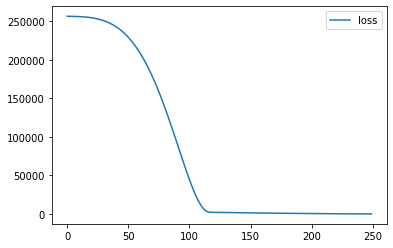

In [11]:
loss_df=pd.DataFrame(model.history.history)
loss_df.plot()

(0.0, 100.0)

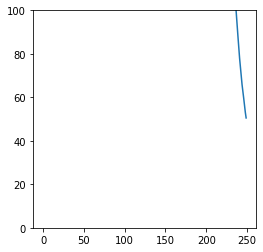

In [12]:
loss_df=pd.DataFrame(model.history.history)
fig, ax = plt.subplots(1,1,figsize=(4,4))
ax.plot(loss_df)
ax.set_ylim(0,100)

# loss_df.plot()
# plt.ylim(0,100)

In [13]:
def eval_metrics(actual, pred):
    rmse = np.sqrt(mean_squared_error(actual, pred))
    mae = mean_absolute_error(actual, pred)
    mse = mean_squared_error(actual, pred)
    score = r2_score(actual, pred)
    return print("r2_score:", score, "\n","mae:", mae, "\n","mse:",mse, "\n","rmse:",rmse)
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import numpy as np
y_pred = model.predict(X_test)
my_dict={"Actual":y_test.reshape(300,), "Pred":y_pred.reshape(300,)}
print(eval_metrics(y_test, y_pred))
compare=pd.DataFrame(my_dict)
compare

r2_score: 0.9944663663881538 
 mae: 5.6729920542099 
 mse: 48.65188194014399 
 rmse: 6.975090102654158
None


Actual        Pred
0    402.296319  411.672668
1    624.156198  618.946838
2    582.455066  588.891479
3    578.588606  570.731995
4    371.224104  375.935608
..          ...         ...
295  525.704657  529.646667
296  502.909473  517.798523
297  612.727910  605.644836
298  417.569725  422.285431
299  410.538250  417.357422

[300 rows x 2 columns]

In [14]:
eval_metrics(y_test, y_pred)

r2_score: 0.9944663663881538 
 mae: 5.6729920542099 
 mse: 48.65188194014399 
 rmse: 6.975090102654158


(0.0, 100.0)

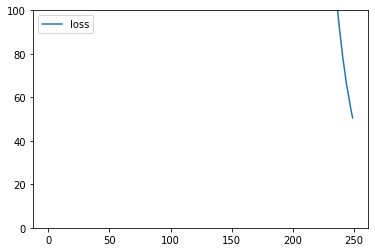

In [15]:
# loss_df=pd.DataFrame(model.history.history)
# fig, ax = plt.subplots(1,1,figsize=(4,4))
# ax.plot(loss_df)
# ax.set_ylim(0,100)
loss_df.plot()
plt.ylim(0,100)

In [16]:
model.evaluate(X_train, y_train,verbose=1)

22/22 [==============================] - 0s 1ms/step - loss: 48.8452


48.84519577026367

In [17]:
model.evaluate(X_test, y_test,verbose=1)

10/10 [==============================] - 0s 3ms/step - loss: 48.6519


48.651878356933594

<AxesSubplot:xlabel='Actual', ylabel='Pred'>

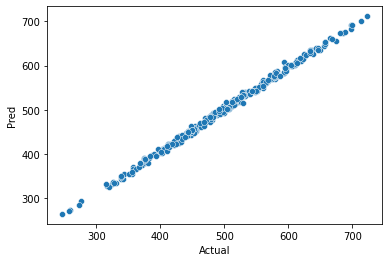

In [18]:
sns.scatterplot(x="Actual", y='Pred', data=compare, legend='full')

# Make a new prediction

In [19]:
new_data = [[999,1001]]

In [20]:
new_data = scaler.transform(new_data)
new_data

array([[0.30608328, 0.71932348]])

In [21]:
model.predict(new_data)

array([[548.1502]], dtype=float32)

In [22]:
model.predict(new_data)[0][0]

548.1502

# Saving and Loading MOdel

In [23]:
from tensorflow.keras.models import load_model
model.save('my_model_001')
loaded_model = load_model('my_model_001')

INFO:tensorflow:Assets written to: my_model_001/assets


In [24]:
loaded_model.predict(new_data)

array([[548.1502]], dtype=float32)

In [28]:
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

early_stop = EarlyStopping(monitor='val_loss',verbose=1, patience=15)
model = Sequential()
model.add(Dense(4,activation='relu')) #Input Layer 
model.add(Dense(4,activation='relu')) #HIdden Layer 1
model.add(Dense(2,activation='relu')) #HIdden Layer 2
model.add(Dense(1)) #Outpur Layer
model.compile(optimizer='rmsprop', loss='mse')
model.fit(X_train, y_train,validation_data=(X_test, y_test), 
          batch_size=32, epochs=450,callbacks=[early_stop]) 
print(model.summary())

Epoch 1/450
22/22 [==============================] - 1s 10ms/step - loss: 260239.5014 - val_loss: 258957.3281
Epoch 2/450
22/22 [==============================] - 0s 5ms/step - loss: 255675.0469 - val_loss: 258815.0625
Epoch 3/450
22/22 [==============================] - 0s 5ms/step - loss: 255572.6984 - val_loss: 258661.2031
Epoch 4/450
22/22 [==============================] - 0s 4ms/step - loss: 257194.7976 - val_loss: 258492.2969
Epoch 5/450
22/22 [==============================] - 0s 4ms/step - loss: 254737.3832 - val_loss: 258305.2500
Epoch 6/450
22/22 [==============================] - 0s 4ms/step - loss: 256943.3553 - val_loss: 258100.1562
Epoch 7/450
22/22 [==============================] - 0s 4ms/step - loss: 255822.5863 - val_loss: 257873.4688
Epoch 8/450
22/22 [==============================] - 0s 4ms/step - loss: 257934.0401 - val_loss: 257623.3594
Epoch 9/450
22/22 [==============================] - 0s 4ms/step - loss: 256552.9260 - val_loss: 257349.3281
Epoch 10/450
22/22

22/22 [==============================] - 0s 4ms/step - loss: 106956.2126 - val_loss: 104432.3594
Epoch 76/450
22/22 [==============================] - 0s 3ms/step - loss: 102846.3570 - val_loss: 99603.6641
Epoch 77/450
22/22 [==============================] - 0s 4ms/step - loss: 94240.6437 - val_loss: 94726.7812
Epoch 78/450
22/22 [==============================] - 0s 4ms/step - loss: 96102.7921 - val_loss: 89938.5703
Epoch 79/450
22/22 [==============================] - 0s 4ms/step - loss: 87042.4569 - val_loss: 85055.2656
Epoch 80/450
22/22 [==============================] - 0s 4ms/step - loss: 80219.8376 - val_loss: 80168.0391
Epoch 81/450
22/22 [==============================] - 0s 4ms/step - loss: 76391.4752 - val_loss: 75352.8203
Epoch 82/450
22/22 [==============================] - 0s 4ms/step - loss: 72404.5160 - val_loss: 70560.8047
Epoch 83/450
22/22 [==============================] - 0s 4ms/step - loss: 68518.4185 - val_loss: 65781.7734
Epoch 84/450
22/22 [==================

22/22 [==============================] - 0s 3ms/step - loss: 865.4665 - val_loss: 763.9437
Epoch 152/450
22/22 [==============================] - 0s 4ms/step - loss: 802.3034 - val_loss: 745.4767
Epoch 153/450
22/22 [==============================] - 0s 3ms/step - loss: 766.5419 - val_loss: 725.6984
Epoch 154/450
22/22 [==============================] - 0s 4ms/step - loss: 692.6674 - val_loss: 707.6534
Epoch 155/450
22/22 [==============================] - 0s 3ms/step - loss: 722.0249 - val_loss: 691.5240
Epoch 156/450
22/22 [==============================] - 0s 4ms/step - loss: 675.4669 - val_loss: 669.3877
Epoch 157/450
22/22 [==============================] - 0s 3ms/step - loss: 659.1740 - val_loss: 652.8813
Epoch 158/450
22/22 [==============================] - 0s 4ms/step - loss: 633.8812 - val_loss: 636.3572
Epoch 159/450
22/22 [==============================] - 0s 4ms/step - loss: 659.0228 - val_loss: 618.6564
Epoch 160/450
22/22 [==============================] - 0s 4ms/step - 

22/22 [==============================] - 0s 4ms/step - loss: 31.4221 - val_loss: 31.2801
Epoch 230/450
22/22 [==============================] - 0s 4ms/step - loss: 29.6902 - val_loss: 31.0358
Epoch 231/450
22/22 [==============================] - 0s 4ms/step - loss: 30.8024 - val_loss: 32.1692
Epoch 232/450
22/22 [==============================] - 0s 4ms/step - loss: 29.3195 - val_loss: 29.1073
Epoch 233/450
22/22 [==============================] - 0s 4ms/step - loss: 28.0557 - val_loss: 28.5981
Epoch 234/450
22/22 [==============================] - 0s 4ms/step - loss: 26.7337 - val_loss: 28.2091
Epoch 235/450
22/22 [==============================] - 0s 3ms/step - loss: 29.5656 - val_loss: 28.1552
Epoch 236/450
22/22 [==============================] - 0s 3ms/step - loss: 25.9949 - val_loss: 28.0750
Epoch 237/450
22/22 [==============================] - 0s 4ms/step - loss: 27.8441 - val_loss: 27.4019
Epoch 238/450
22/22 [==============================] - 0s 4ms/step - loss: 27.6987 - va

In [30]:
from tensorflow.keras.optimizers import Adam,RMSprop
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Activation

early_stop = EarlyStopping(monitor='val_loss',verbose=1, patience=15)
model = Sequential()
model.add(Dense(4,activation='relu')) #Input Layer 
model.add(Dense(4,activation='relu')) #HIdden Layer 1
model.add(Dense(2,activation='relu')) #HIdden Layer 2
model.add(Dense(1)) #Outpur Layer

opt=Adam(learning_rate=0.1)
model.compile(optimizer=opt, loss='mse')
model.fit(X_train, y_train,validation_data=(X_test, y_test), 
          batch_size=32, epochs=450,callbacks=[early_stop]) 
print(model.summary())

Epoch 1/450
22/22 [==============================] - 1s 10ms/step - loss: 251153.8166 - val_loss: 256965.3281
Epoch 2/450
22/22 [==============================] - 0s 4ms/step - loss: 249312.8580 - val_loss: 254776.7656
Epoch 3/450
22/22 [==============================] - 0s 4ms/step - loss: 249990.8791 - val_loss: 252608.4531
Epoch 4/450
22/22 [==============================] - 0s 4ms/step - loss: 246218.0177 - val_loss: 250452.2969
Epoch 5/450
22/22 [==============================] - 0s 5ms/step - loss: 247217.5720 - val_loss: 248311.0625
Epoch 6/450
22/22 [==============================] - 0s 4ms/step - loss: 243617.4952 - val_loss: 246182.8594
Epoch 7/450
22/22 [==============================] - 0s 5ms/step - loss: 238434.3111 - val_loss: 244073.8906
Epoch 8/450
22/22 [==============================] - 0s 4ms/step - loss: 243671.2459 - val_loss: 241973.1250
Epoch 9/450
22/22 [==============================] - 0s 4ms/step - loss: 239630.0197 - val_loss: 239892.9531
Epoch 10/450
22/22

22/22 [==============================] - 0s 5ms/step - loss: 126083.8601 - val_loss: 129456.0234
Epoch 76/450
22/22 [==============================] - 0s 4ms/step - loss: 128296.6301 - val_loss: 128141.6641
Epoch 77/450
22/22 [==============================] - 0s 4ms/step - loss: 132182.2768 - val_loss: 126835.0391
Epoch 78/450
22/22 [==============================] - 0s 4ms/step - loss: 123709.6495 - val_loss: 125550.2969
Epoch 79/450
22/22 [==============================] - 0s 5ms/step - loss: 123992.0730 - val_loss: 124266.1094
Epoch 80/450
22/22 [==============================] - 0s 4ms/step - loss: 123576.2221 - val_loss: 122995.9844
Epoch 81/450
22/22 [==============================] - 0s 4ms/step - loss: 119822.0200 - val_loss: 121733.8438
Epoch 82/450
22/22 [==============================] - 0s 4ms/step - loss: 115485.9046 - val_loss: 120487.2031
Epoch 83/450
22/22 [==============================] - 0s 4ms/step - loss: 119792.1895 - val_loss: 119237.1562
Epoch 84/450
22/22 [===

22/22 [==============================] - 0s 4ms/step - loss: 55113.1790 - val_loss: 55203.8086
Epoch 151/450
22/22 [==============================] - 0s 4ms/step - loss: 53847.7294 - val_loss: 54510.9766
Epoch 152/450
22/22 [==============================] - 0s 4ms/step - loss: 52057.2055 - val_loss: 53820.1836
Epoch 153/450
22/22 [==============================] - 0s 4ms/step - loss: 55432.8645 - val_loss: 53133.0352
Epoch 154/450
22/22 [==============================] - 0s 4ms/step - loss: 52500.8088 - val_loss: 52464.0430
Epoch 155/450
22/22 [==============================] - 0s 4ms/step - loss: 52210.5148 - val_loss: 51793.0938
Epoch 156/450
22/22 [==============================] - 0s 4ms/step - loss: 51053.5241 - val_loss: 51134.6602
Epoch 157/450
22/22 [==============================] - 0s 6ms/step - loss: 48750.2981 - val_loss: 50482.0898
Epoch 158/450
22/22 [==============================] - 0s 4ms/step - loss: 49175.3096 - val_loss: 49830.9336
Epoch 159/450
22/22 [============

22/22 [==============================] - 0s 6ms/step - loss: 18720.8321 - val_loss: 20063.9043
Epoch 226/450
22/22 [==============================] - 0s 5ms/step - loss: 18849.6922 - val_loss: 19795.4180
Epoch 227/450
22/22 [==============================] - 0s 4ms/step - loss: 19502.5204 - val_loss: 19531.9238
Epoch 228/450
22/22 [==============================] - 0s 4ms/step - loss: 18298.3892 - val_loss: 19279.7969
Epoch 229/450
22/22 [==============================] - 0s 4ms/step - loss: 18208.5141 - val_loss: 19025.2188
Epoch 230/450
22/22 [==============================] - 0s 4ms/step - loss: 17243.7707 - val_loss: 18777.6934
Epoch 231/450
22/22 [==============================] - 0s 4ms/step - loss: 18581.9115 - val_loss: 18529.1465
Epoch 232/450
22/22 [==============================] - 0s 4ms/step - loss: 18929.9214 - val_loss: 18287.2227
Epoch 233/450
22/22 [==============================] - 0s 7ms/step - loss: 18175.3115 - val_loss: 18051.0781
Epoch 234/450
22/22 [============

22/22 [==============================] - 0s 4ms/step - loss: 10315.3107 - val_loss: 9793.2959
Epoch 301/450
22/22 [==============================] - 0s 4ms/step - loss: 9603.1695 - val_loss: 9749.9404
Epoch 302/450
22/22 [==============================] - 0s 3ms/step - loss: 9349.4353 - val_loss: 9709.3379
Epoch 303/450
22/22 [==============================] - 0s 4ms/step - loss: 9247.4973 - val_loss: 9670.7568
Epoch 304/450
22/22 [==============================] - 0s 4ms/step - loss: 9169.2967 - val_loss: 9630.5771
Epoch 305/450
22/22 [==============================] - 0s 5ms/step - loss: 9473.0876 - val_loss: 9595.2012
Epoch 306/450
22/22 [==============================] - 0s 4ms/step - loss: 9958.1236 - val_loss: 9558.9395
Epoch 307/450
22/22 [==============================] - 0s 4ms/step - loss: 9998.0070 - val_loss: 9524.0146
Epoch 308/450
22/22 [==============================] - 0s 4ms/step - loss: 10338.6050 - val_loss: 9491.4961
Epoch 309/450
22/22 [============================

22/22 [==============================] - 0s 3ms/step - loss: 8394.9662 - val_loss: 8812.7314
Epoch 377/450
22/22 [==============================] - 0s 4ms/step - loss: 8613.2327 - val_loss: 8811.1621
Epoch 378/450
22/22 [==============================] - 0s 4ms/step - loss: 8560.9481 - val_loss: 8811.1445
Epoch 379/450
22/22 [==============================] - 0s 4ms/step - loss: 8999.6039 - val_loss: 8809.5625
Epoch 380/450
22/22 [==============================] - 0s 5ms/step - loss: 9001.1654 - val_loss: 8808.7920
Epoch 381/450
22/22 [==============================] - 0s 4ms/step - loss: 9230.6186 - val_loss: 8807.9570
Epoch 382/450
22/22 [==============================] - 0s 4ms/step - loss: 8521.7848 - val_loss: 8807.0439
Epoch 383/450
22/22 [==============================] - 0s 4ms/step - loss: 8978.1991 - val_loss: 8806.6113
Epoch 384/450
22/22 [==============================] - 0s 3ms/step - loss: 8582.1165 - val_loss: 8806.4219
Epoch 385/450
22/22 [==============================

In [ ]:
#keras.optimizers.Adam(lr=0.001, beta_1=0.9, beta_2=0.999, epsilon=1e-08, decay=0.0)